In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
# The following directive activates inline plotting
%matplotlib inline

## Loops comparison

Dicty loops

(array([22., 54., 71., 48., 23., 14.,  7.,  1.,  0.,  1.]),
 array([20000., 27600., 35200., 42800., 50400., 58000., 65600., 73200.,
        80800., 88400., 96000.]),
 <a list of 10 Patch objects>)

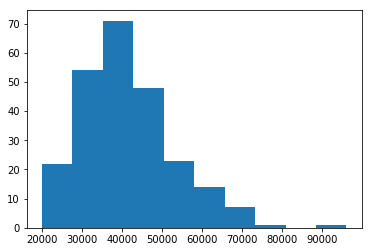

In [3]:
loops_dicty = pandas.read_excel('dicty/dicty_loop_positions_Chr1_Chr6.xlsx')
loops_dicty_sizes = loops_dicty['Size (Kb)'].values * 2 * 10**3
plt.hist(loops_dicty_sizes)

In [4]:
np.mean(loops_dicty_sizes)

40398.34024896265

Rao loops

(array([9.384e+03, 2.400e+01, 6.000e+00, 8.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.300e+01]),
 array([7.00020000e+04, 4.42030020e+07, 8.83360020e+07, 1.32469002e+08,
        1.76602002e+08, 2.20735002e+08, 2.64868002e+08, 3.09001002e+08,
        3.53134002e+08, 3.97267002e+08, 4.41400002e+08]),
 <a list of 10 Patch objects>)

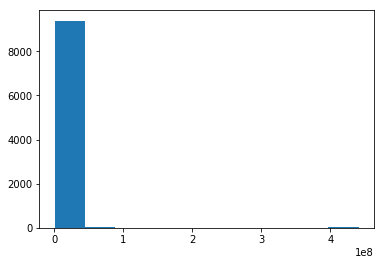

In [5]:
loops_rao = pandas.read_csv('rao/GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt', sep='\t',
                             dtype = {'x1': np.long, 'x2': np.long, 'y1': np.long, 'y2': np.long})
loops_rao_sizes = (loops_rao['y1'] - loops_rao['x1'] + 1) * 2
plt.hist((loops_rao_sizes))

In [6]:
np.mean(loops_rao_sizes)

2347663.939034716

In [7]:
np.mean(loops_rao_sizes)/np.mean(loops_dicty_sizes)

58.11288098884209

## Scaled densities comparison

In [8]:
rao_loop_mean = np.load('rao/arrs/densities/avg_density_loops_mean_rao.npy')
rao_btw_mean = np.load('rao/arrs/densities/avg_density_btw_mean_rao.npy')

dicty_loop_mean = np.load('dicty/arrs/densities/avg_density_loops_mean_dicty.npy')
dicty_btw_mean = np.load('dicty/arrs/densities/avg_density_btw_mean_dicty.npy')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


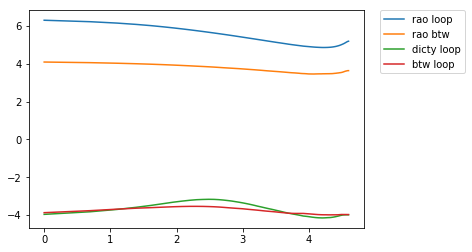

In [9]:
fig = plt.figure()
ax = plt.axes()

plt.plot(np.log(range(rao_loop_mean.shape[0])), np.log(rao_loop_mean), label='rao loop')
plt.plot(np.log(range(rao_btw_mean.shape[0])), np.log(rao_btw_mean), label='rao btw')
plt.plot(np.log(range(dicty_loop_mean.shape[0])), np.log(dicty_loop_mean), label='dicty loop')
plt.plot(np.log(range(dicty_btw_mean.shape[0])), np.log(dicty_btw_mean), label='btw loop');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()